# Algoritmos No Supervisados
## Clustering
`Clasificacion`: Lo que buscamos es agrupar datos que tengan cierta semejanza o similutudes. Lo que no entre dentro de estos campos tiene que ser muy difirente e incluso entre ellos.

`Propiedades`: 
* Los clusters deben ser identificables y de tamanio considerable.
* Los puntos de un mismo cluster deben ser compactos y tener intersecciones minimas con cualquier otro cluster
* Los cluster deben tener sentido desde el contexto de analisis. Los puntos de un mismo cluster deben tener propiedades comunes en el contexto estudiado.


### Matematica de Clustering

Calcular la distancia n-dimensional entre los puntos. Mientras mas cercanos esten mas relacion tienen.

* n cantidad de columnas
* N cantidad de filas
* X dataset y xi

#### `Distancia de Manhatta`
Consiste en la diferencia entre dos usuarios por categoria (valor absoluto). Luego realizar la sumatoria de todas las categorias. Esto nos va a dar un valor que va a ser la distancia entre ambos elementos.
#### `Distancia Euclidea`
Es el concepto de distancia en linea recta (pensado desde una perspectiva de pitagoras) Es la raiz de la sumatoria de las sumas de las diferencias al cuadrado.
#### `Distancia de Minkowski`
Este modelo se puede aplicar utilizando `distance_matrix` del paquete `scipy.spatial` de python. Esto finalmente se resume en las `matrices de distancias`.

`pd.DataFrame(distance_matrix(data['movie'],data['movie'],p=2),index=data['id'],columns=data['id']`

#### Normalizar las distancias
La existencia de datos extremadamente grandes pueden generar problemas de entendimiento dentro de la tabla (por ejemplo, se compara ganancias y eso genera que alguien que tenga datos completamente similares pero las ganancias de ambos es muy significativa genera que el valor sea mucho mas grande).La solucion, consiste en darle a todos los datos el mismo rango de valores. **valores que dominan a otros por cantidad**

Esto se puede hacer buscando el valor mas grande de cada fila y dividir todos los elementos por ese. Siendo el valor maximo 1 y el minimo 0.

### Distancias

In [1]:
import numpy as np
import pandas as pd
from scipy.spatial import distance_matrix

In [2]:
data = pd.read_csv('../python-ml-course-master/datasets/movies/movies.csv',sep=";")
data

,user_id,star_wars,lord_of_the_rings,harry_potter
0,1,1.2,4.9,2.1
1,2,2.1,8.1,7.9
2,3,7.4,3.0,9.9
3,4,5.6,0.5,1.8
4,5,1.5,8.3,2.6
5,6,2.5,3.7,6.5
6,7,2.0,8.2,8.5
7,8,1.8,9.3,4.5
8,9,2.6,1.7,3.1
9,10,1.5,4.7,2.3


In [3]:
movies = data.columns.values.tolist()[1:]
movies

['star_wars', 'lord_of_the_rings', 'harry_potter']

In [4]:
dd1 = distance_matrix(data[movies],data[movies],p=1) #distancia de manhattan
dd2 = distance_matrix(data[movies],data[movies],p=2) #distancia de minkowski
dd3 = distance_matrix(data[movies],data[movies],p=10)

In [5]:
def dm_to_df(dd,col_names):
    import pandas as pd
    return pd.DataFrame(dd,index=col_names,columns=col_names)

In [6]:
df1 = dm_to_df(dd1,data['user_id'])
df2 = dm_to_df(dd2,data['user_id'])
df3 = dm_to_df(dd3,data['user_id'])

In [7]:
df1

user_id,1,2,3,4,5,6,7,8,9,10
user_id,,,,,,,,,,
1,0.0,9.9,15.9,9.1,4.2,6.9,10.5,7.4,5.6,0.7
2,9.9,0.0,12.4,17.2,6.1,6.2,0.8,4.9,11.7,9.6
3,15.9,12.4,0.0,12.4,18.5,9.0,12.0,17.3,12.9,15.2
4,9.1,17.2,12.4,0.0,12.7,11.0,18.0,15.3,5.5,8.8
5,4.2,6.1,18.5,12.7,0.0,9.5,6.5,3.2,8.2,3.9
6,6.9,6.2,9.0,11.0,9.5,0.0,7.0,8.3,5.5,6.2
7,10.5,0.8,12.0,18.0,6.5,7.0,0.0,5.3,12.5,10.2
8,7.4,4.9,17.3,15.3,3.2,8.3,5.3,0.0,9.8,7.1
9,5.6,11.7,12.9,5.5,8.2,5.5,12.5,9.8,0.0,4.9


In [8]:
df2

user_id,1,2,3,4,5,6,7,8,9,10
user_id,,,,,,,,,,
1,0.000000,6.685058,10.143471,6.229767,3.449638,4.742362,7.244998,5.047772,3.633180,0.412311
2,6.685058,0.000000,7.622336,10.354709,5.337602,4.634652,0.616441,3.618011,8.015610,6.578754
3,10.143471,7.622336,0.000000,8.666026,10.779147,6.004998,7.626270,10.010494,8.424369,9.770363
4,6.229767,10.354709,8.666026,0.000000,8.848164,6.476110,10.823123,9.958414,3.482815,5.890671
5,3.449638,5.337602,10.779147,8.848164,0.000000,6.113101,5.921993,2.167948,6.709694,3.612478
6,4.742362,4.634652,6.004998,6.476110,6.113101,0.000000,4.949747,5.987487,3.945884,4.431704
7,7.244998,0.616441,7.626270,10.823123,5.921993,4.949747,0.000000,4.153312,8.471718,7.137226
8,5.047772,3.618011,10.010494,9.958414,2.167948,5.987487,4.153312,0.000000,7.769170,5.107837
9,3.633180,8.015610,8.424369,3.482815,6.709694,3.945884,8.471718,7.769170,0.000000,3.293934


In [9]:
df3

user_id,1,2,3,4,5,6,7,8,9,10
user_id,,,,,,,,,,
1,0.000000,5.801514,7.875189,4.715803,3.400000,4.400003,6.400850,4.401025,3.200085,0.301025
2,5.801514,0.000000,5.582463,7.680689,5.300000,4.400005,0.600000,3.400010,6.435159,5.603800
3,7.875189,5.582463,0.000000,8.100007,7.408914,4.912532,5.689450,6.570254,6.820602,7.658364
4,4.715803,7.680689,8.100007,0.000000,7.801255,4.717102,7.873307,8.800205,3.000101,4.450759
5,3.400000,5.300000,7.408914,7.801255,0.000000,4.681464,5.900000,1.900310,6.600000,3.600000
6,4.400003,4.400005,4.912532,4.717102,4.681464,0.000000,4.500135,5.600019,3.401683,4.200000
7,6.400850,0.600000,5.689450,7.873307,5.900000,4.500135,0.000000,4.000001,6.595259,6.202035
8,4.401025,3.400010,6.570254,8.800205,1.900310,5.600019,4.000001,0.000000,7.600000,4.600288
9,3.200085,6.435159,6.820602,3.000101,6.600000,3.401683,6.595259,7.600000,0.000000,3.000014


In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

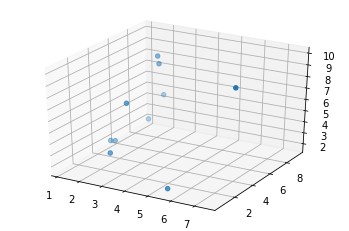

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs= data['star_wars'], ys=data['lord_of_the_rings'], zs=data['harry_potter'])

### Metodos de enlaces
Cada uno es diferente y los resultados pueden llegar a ser muy diferentes entre ellos.
##### Enlace Simple
##### Enlace Completo
##### Enlace Promedio
##### Enlace de Centroide
##### Enlace Ward
### Clustering Jerarquico
Una vez reconocidos los enclaces y la distancia entre los elementos podemos agruparlos a travez de otras categorias que engloben a otras.

In [12]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [13]:
data[movies]

,star_wars,lord_of_the_rings,harry_potter
0,1.2,4.9,2.1
1,2.1,8.1,7.9
2,7.4,3.0,9.9
3,5.6,0.5,1.8
4,1.5,8.3,2.6
5,2.5,3.7,6.5
6,2.0,8.2,8.5
7,1.8,9.3,4.5
8,2.6,1.7,3.1
9,1.5,4.7,2.3


In [14]:
z = linkage(data[movies],"ward")
z

array([[ 0.        ,  9.        ,  0.41231056,  2.        ],
       [ 1.        ,  6.        ,  0.6164414 ,  2.        ],
       [ 4.        ,  7.        ,  2.16794834,  2.        ],
       [ 3.        ,  8.        ,  3.48281495,  2.        ],
       [ 5.        , 10.        ,  5.2943366 ,  3.        ],
       [13.        , 14.        ,  6.59317829,  5.        ],
       [11.        , 12.        ,  6.66408283,  4.        ],
       [ 2.        , 15.        , 10.62355873,  6.        ],
       [16.        , 17.        , 12.8156935 , 10.        ]])

los primeros dos datos son los que se unieron, luego esta la distancia y finalmente la cantidad de elementos

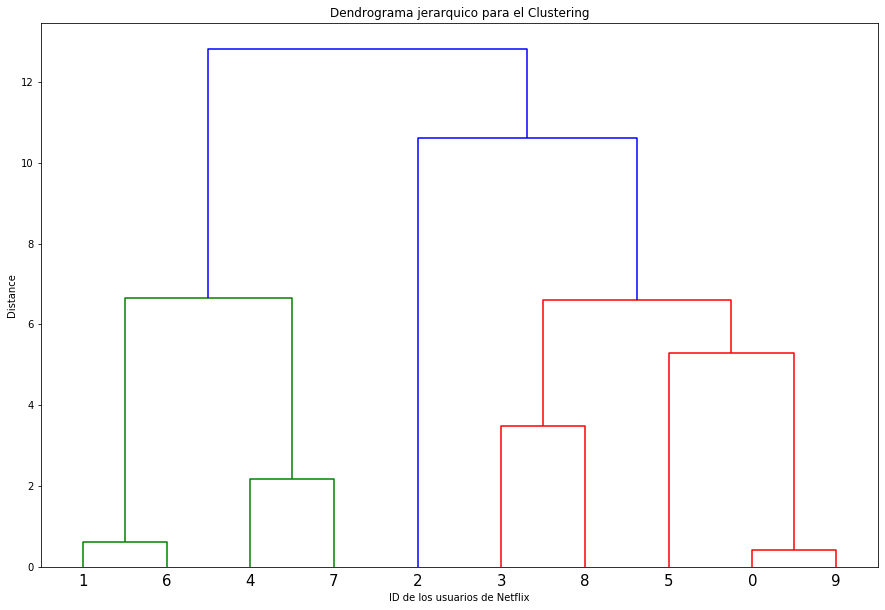

In [15]:
plt.figure(figsize=(15,10))
plt.title('Dendrograma jerarquico para el Clustering')
plt.xlabel("ID de los usuarios de Netflix")
plt.ylabel("Distance")
dendrogram(z,leaf_font_size=15)
plt.show()

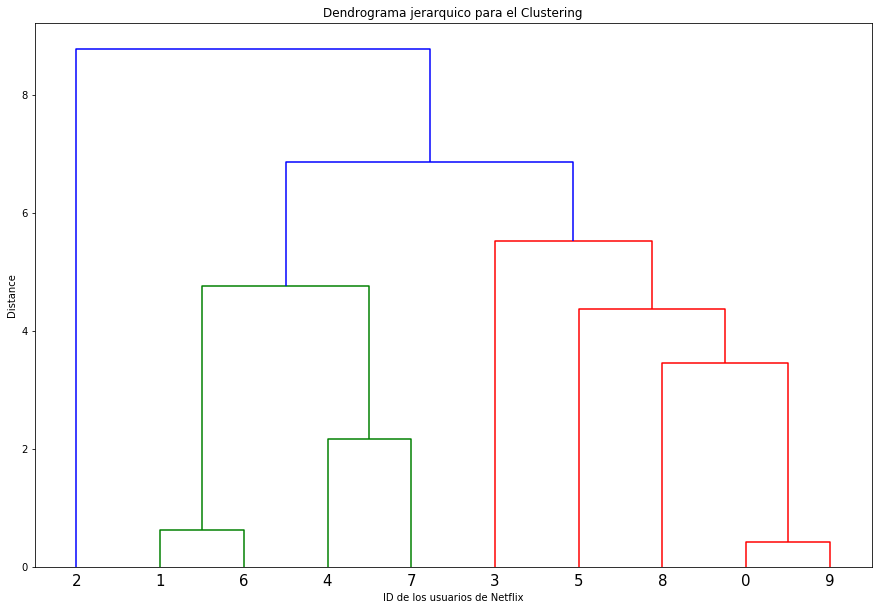

In [16]:
z = linkage(data[movies],"average")
plt.figure(figsize=(15,10))
plt.title('Dendrograma jerarquico para el Clustering')
plt.xlabel("ID de los usuarios de Netflix")
plt.ylabel("Distance")
dendrogram(z,leaf_font_size=15)
plt.show()

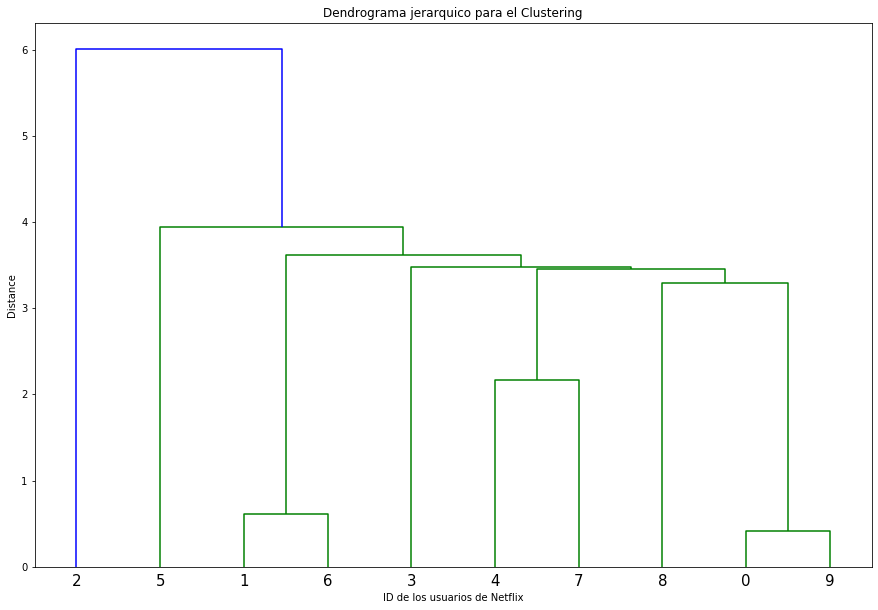

In [17]:
z = linkage(data[movies],"single")
plt.figure(figsize=(15,10))
plt.title('Dendrograma jerarquico para el Clustering')
plt.xlabel("ID de los usuarios de Netflix")
plt.ylabel("Distance")
dendrogram(z,leaf_font_size=15)
plt.show()

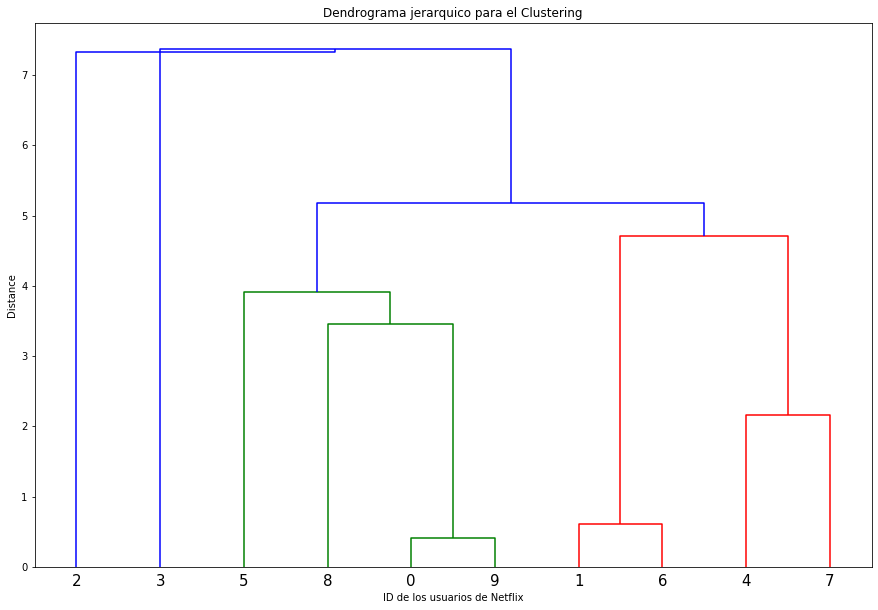

In [18]:
z = linkage(data[movies],"median")
plt.figure(figsize=(15,10))
plt.title('Dendrograma jerarquico para el Clustering')
plt.xlabel("ID de los usuarios de Netflix")
plt.ylabel("Distance")
dendrogram(z,leaf_font_size=15)
plt.show()

https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html


podemos utilizar metricas para `linkage`, estas pueden ser dadas por `scipy.spatial.distance.pdist(X , metric= ) `.

The distance metric to use. The distance function can be ‘braycurtis’, ‘canberra’, ‘chebyshev’, ‘cityblock’, ‘correlation’, ‘cosine’, ‘dice’, ‘euclidean’, ‘hamming’, ‘jaccard’, ‘jensenshannon’, ‘kulsinski’, ‘mahalanobis’, ‘matching’, ‘minkowski’, ‘rogerstanimoto’, ‘russellrao’, ‘seuclidean’, ‘sokalmichener’, ‘sokalsneath’, ‘sqeuclidean’, ‘yule’.

### Clustering jerárquico y dendrogramas

Una de las ventajas de utilizar este metodo de clasificacion es que no hace falta saber de antemano cuantos o cuales van a ser las categorizaciones que se realizaran.

Es uno de los metodos no supervisados mas populares para agrupar datos.


Antes de empezar, pongamos un poco de notación para hablar todos el mismo idioma

* X dataset (array de n x m) de puntos a clusterizar
* n número de datos
* m número de rasgos 
* Z array de enlace del cluster con la información de las uniones
* k número de clusters

In [19]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist
import numpy as np
import pandas as pd

(150, 2)


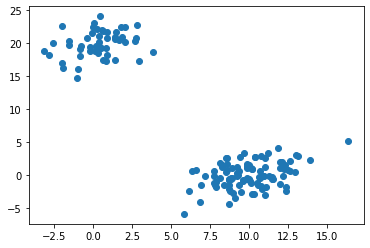

In [20]:
np.random.seed(4711)
### valores medio entre X e Y , desviacion entre 3 en X e 4 en Y , de un tamanio de..
a = np.random.multivariate_normal([10,0],[[3,1],[1,4]],size = [100,])
b = np.random.multivariate_normal([0,20],[[3,1],[1,4]],size = [50,])
X = np.concatenate((a,b))
print(X.shape)
plt.scatter(X[:,0],X[:,1])
plt.show()

In [21]:
Z = linkage(X,'ward')

In [22]:
#Porcentaje de conservacion de las distancias originales con respecto de los clusteres que se generarnon
c , coph_dist = cophenet(Z, pdist(X))
c

0.9800148387574268

In [23]:
Z[:20]

array([[5.20000000e+01, 5.30000000e+01, 4.15105485e-02, 2.00000000e+00],
       [1.40000000e+01, 7.90000000e+01, 5.91375926e-02, 2.00000000e+00],
       [3.30000000e+01, 6.80000000e+01, 7.10677929e-02, 2.00000000e+00],
       [1.70000000e+01, 7.30000000e+01, 7.13712071e-02, 2.00000000e+00],
       [1.00000000e+00, 8.00000000e+00, 7.54313099e-02, 2.00000000e+00],
       [8.50000000e+01, 9.50000000e+01, 1.09277896e-01, 2.00000000e+00],
       [1.08000000e+02, 1.31000000e+02, 1.10071548e-01, 2.00000000e+00],
       [9.00000000e+00, 6.60000000e+01, 1.13022407e-01, 2.00000000e+00],
       [1.50000000e+01, 6.90000000e+01, 1.14289714e-01, 2.00000000e+00],
       [6.30000000e+01, 9.80000000e+01, 1.21200766e-01, 2.00000000e+00],
       [1.07000000e+02, 1.15000000e+02, 1.21671017e-01, 2.00000000e+00],
       [6.50000000e+01, 7.40000000e+01, 1.24900190e-01, 2.00000000e+00],
       [5.80000000e+01, 6.10000000e+01, 1.40277358e-01, 2.00000000e+00],
       [6.20000000e+01, 1.52000000e+02, 1.72599535e

In [24]:
#De esta forma podemos saber como se formo el cluster
Z[152-len(X)]

array([33.        , 68.        ,  0.07106779,  2.        ])

In [25]:
#y aca podemos ver la posicion de los elementos. Como podemos apreciar se aproximan.
idx = [33,68,62]
X[idx]

array([[ 9.83913054, -0.48729797],
       [ 9.8934927 , -0.44152257],
       [ 9.97792822, -0.56383202]])

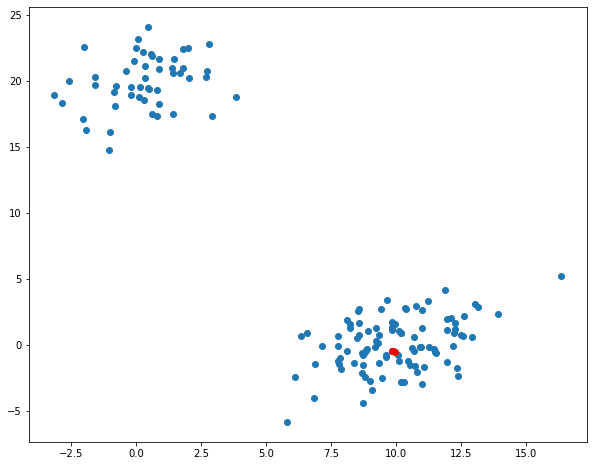

In [26]:
plt.figure(figsize=(10,8))
plt.scatter(X[:,0],X[:,1])
plt.scatter(X[idx,0],X[idx,1],c="r")

### Representacion grafica de un dendrograma

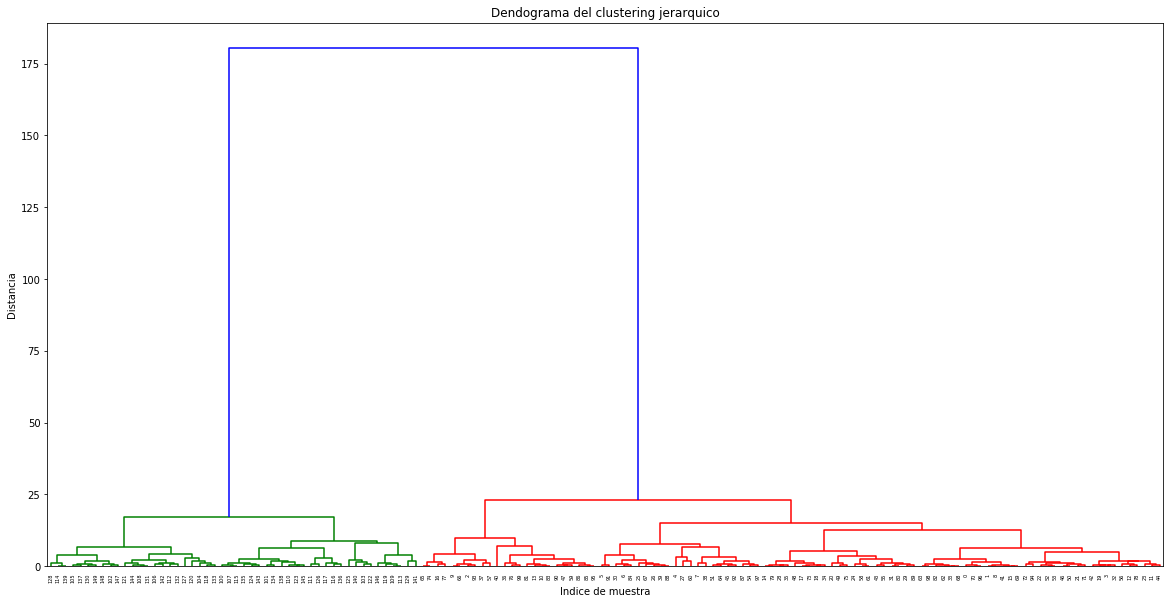

In [27]:
plt.figure(figsize=(20,10))
plt.title('Dendograma del clustering jerarquico')
plt.xlabel('Indice de muestra')
plt.ylabel('Distancia')
dendrogram(Z)
plt.show()

### Truncamiento de Endrograma

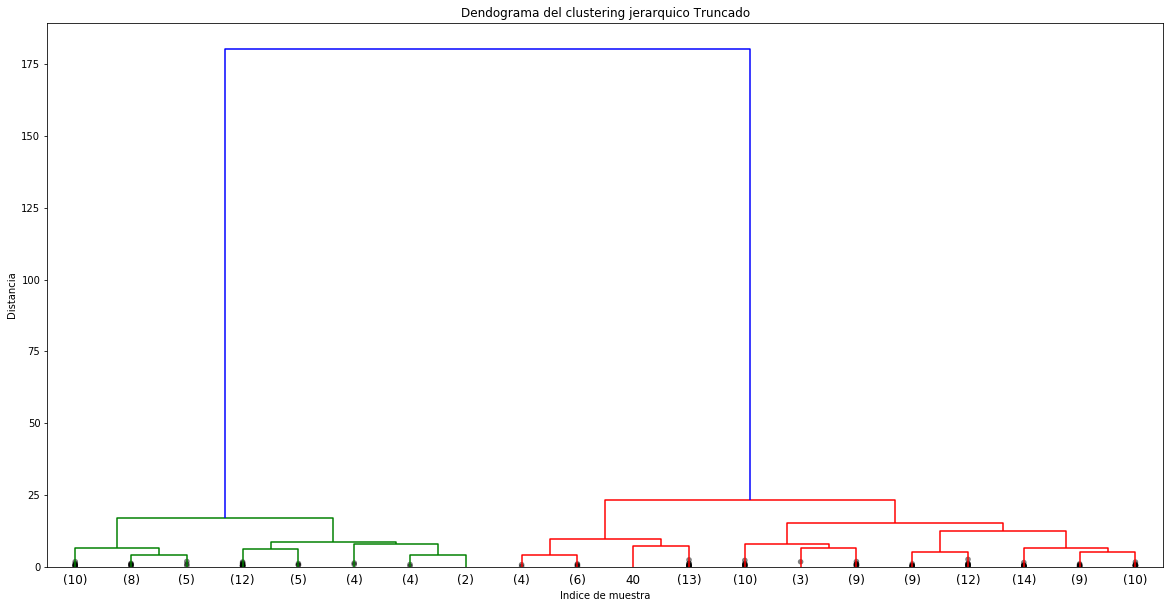

In [28]:
plt.figure(figsize=(20,10))
plt.title('Dendograma del clustering jerarquico Truncado')
plt.xlabel('Indice de muestra')
plt.ylabel('Distancia')
#los ultimos p elementos unidos, que ultimpos cluster muestro, show_l = mostrar las uniones, 
#show_c mostrar contraidos
dendrogram(Z, truncate_mode="lastp" , p=20, show_leaf_counts=True, show_contracted=True)
plt.show()

### Dendrograma Tuneado

In [29]:
def dendogram_tune(*args, **kwargs):
    max_d = kwargs.pop('max_d',None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)
    
    ddata = dendrogram(*args,**kwargs)
    
    if not kwargs.get('no_plot',False):
        plt.title('Clustering jerarquico con Dendograma truncado')
        plt.xlabel('Indice de Dataset (o tamanio de cluster)')
        plt.ylabel('Distancia')
        for i,d,c in zip(ddata['icoord'],ddata['dcoord'],ddata['color_list']):
            X = 0.5 * sum(i[1:3])
            Y = d[1]
            if Y > annotate_above:
                plt.plot(X,Y,'o',c=c)
                plt.annotate('%.3g'%Y,(X,Y),xytext=(0,-5),textcoords='offset points', va='top',ha='center')
                
    if max_d:
        plt.axhline(y=max_d,c='k')
        
    return ddata

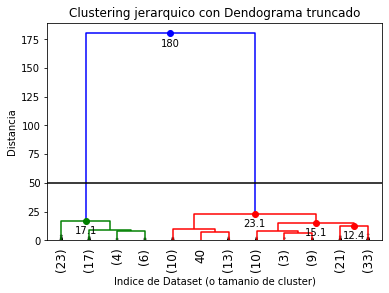

In [30]:
dendogram_tune(Z,truncate_mode='lastp',p=12,leaf_rotation=90.,leaf_font_size=12.,
               show_contracted=True, annotate_above = 10, max_d=50)
plt.show()

### Corte automatico del endrograma

`inconcistency_i = ( h_i - avg(h_j)/std(h_j) )`

In [31]:
from scipy.cluster.hierarchy import inconsistent

In [32]:
#Esta es la profundidad del arbol
depth = 5
incons = inconsistent(Z , depth)
incons
## Promedio , desviacion estandar , numero de elementos, factor de inconcientencia de cada valor

array([[4.15105485e-02, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [5.91375926e-02, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [7.10677929e-02, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [7.13712071e-02, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [7.54313099e-02, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.09277896e-01, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.10071548e-01, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.13022407e-01, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.14289714e-01, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.21200766e-01, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.21671017e-01, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.24900190e-01, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.40277358e-01, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.21833664e-01, 7.17937830e-02, 2.00000000e

### Metodo del codo
Busca la aceleracion de crecimientos y de esta forma encuentra la diferencia de clusters

* El problema del metodo del codo es que realmente si no esta ordenado no se ve la distancia

[180.27043021  23.12198936  17.11527362  15.11533118  12.42734657
   9.84427829   8.74822275   8.04935282   7.86878542   7.11106083]


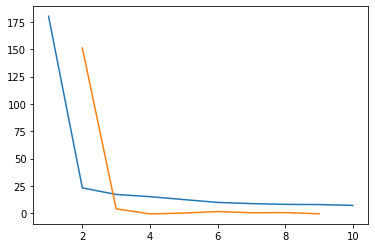

El numero optimo de cluster es  2


In [33]:
last = Z[-10:,2]
last_rev = last[::-1]
print(last_rev)
idx = np.arange(1, len(last_rev)+1)
plt.plot(idx,last_rev)

acc = np.diff(last,2)
acc_rev = acc[::-1]
plt.plot(idx[:-2]+1,acc_rev)
plt.show()
k = acc_rev.argmax() + 2
print("El numero optimo de cluster es ",k)

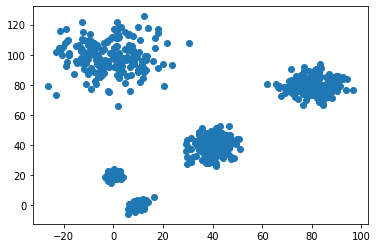

In [34]:
c = np.random.multivariate_normal([40,40],[[20,1],[1,30]], size=[200,])
d = np.random.multivariate_normal([80,80],[[30,1],[1,30]], size=[200,])
e = np.random.multivariate_normal([0,100],[[100,1],[1,100]], size=[200,])
X2 = np.concatenate((X,c,d,e))
plt.scatter(X2[:,0],X2[:,1])
plt.show()

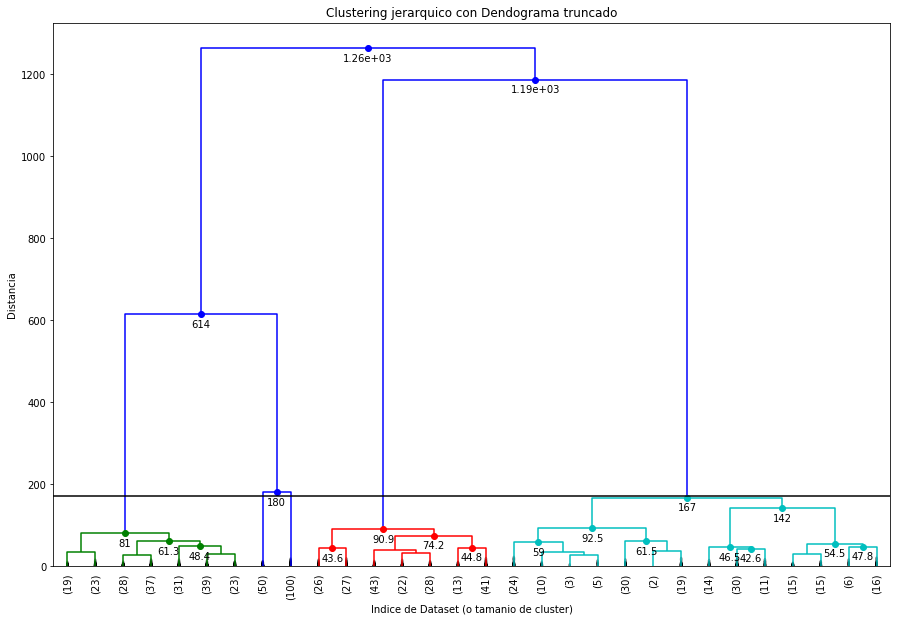

In [44]:
z2 = linkage(X2,'ward')
plt.figure(figsize=(15,10))
dendogram_tune(
    z2, 
    truncate_mode='lastp',
    p=30,
    leaf_rotation=90, 
    leaf_font_size=10.,
    show_contracted=True,
    annotate_above=40,
    max_d=170
)
plt.show()

[1262.52130994 1186.7588235   614.06504667  180.27043021  166.66434658
  141.92437181   92.54599212   90.91214341   80.96733501   74.17015312]


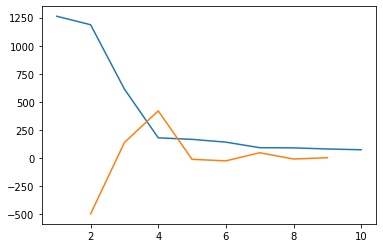

El numero optimo de cluster es  4


In [45]:
last = z2[-10:,2]
last_rev = last[::-1]
print(last_rev)
idx = np.arange(1, len(last_rev)+1)
plt.plot(idx,last_rev)

acc = np.diff(last,2)
acc_rev = acc[::-1]
plt.plot(idx[:-2]+1,acc_rev)
plt.show()
k = acc_rev.argmax() + 2
print("El numero optimo de cluster es ",k)

In [47]:
print(inconsistent(z2,5)[-10:])

[[ 13.99221995  15.56655759  30.           3.8658472 ]
 [ 16.73940735  18.56390061  30.           3.45982932]
 [ 19.05945013  20.53210626  31.           3.49952861]
 [ 19.25573887  20.8265769   29.           3.51907342]
 [ 21.36116189  26.77659523  30.           4.50255938]
 [ 36.58100874  37.08602393  31.           3.50761079]
 [ 12.12200256  32.15467931  30.           5.22936105]
 [ 42.61369802 111.38576865  31.           5.13038026]
 [ 81.75198678 208.31582073  31.           5.30447871]
 [147.25602023 307.95700562  31.           3.62149673]]


Todo lo anteriormente visto es para determinar el K optimo, osea cuantos serian los clusters
## Recuperar los Cluster y sus elementos
Ahora solo queda interpretar

In [49]:
from scipy.cluster.hierarchy import fcluster

In [55]:
max_d = 20
cluster = fcluster(Z,max_d,criterion='distance')
cluster

array([3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 2, 3, 3, 3,
       3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 2,
       2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 3, 2, 3, 2, 3, 2, 2, 3,
       3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [56]:
k = 3
cluster = fcluster(Z, k, criterion='maxclust')
cluster

array([3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 2, 3, 3, 3,
       3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 2,
       2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 3, 2, 3, 2, 3, 2, 2, 3,
       3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

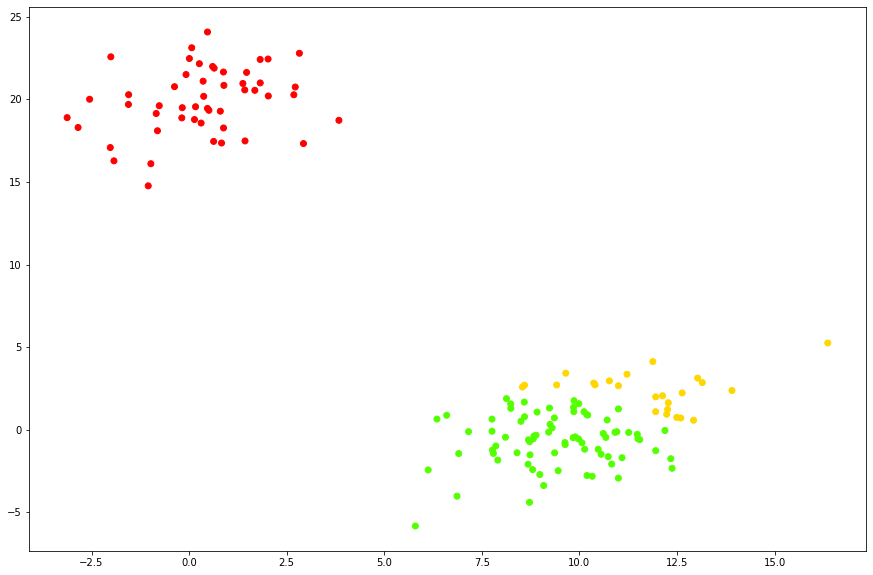

In [57]:
plt.figure(figsize=(15,10))
plt.scatter(X[:,0],X[:,1],c=cluster,cmap='prism')
plt.show()

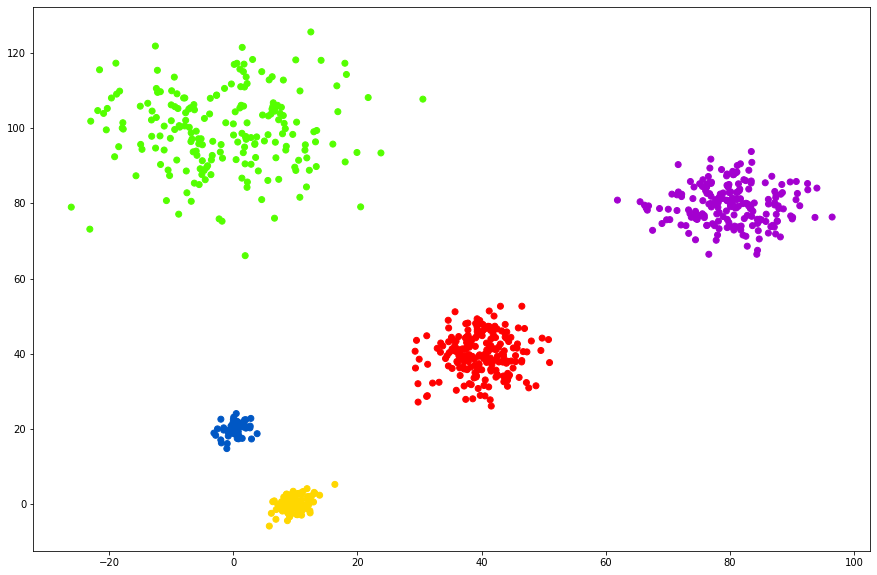

In [59]:
max_d = 170
plt.figure(figsize=(15,10))
cluster = fcluster(z2,max_d,criterion="distance")
plt.scatter(X2[:,0],X2[:,1],c=cluster,cmap='prism')